In [111]:
class convertCVtoText:
    @staticmethod
    def startConversion(fileName):
        import PyPDF2
        pdfFileObj = open(fileName,'rb')     #'rb' for read binary mode
        pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
        noOfPages=pdfReader.numPages
        text=""
        for pages in range(0,pdfReader.numPages):
            pageObj = pdfReader.getPage(pages)          #'9' is the page number
            text+=pageObj.extractText()
        return text

In [112]:
class exceptionHandler(Exception):
    def __init__(self,*args,**kwargs):
        Exception.__init__(self,*args,**kwargs)
        

In [113]:
class regularExp:
    @staticmethod
    def normalizeText(text):
        norText=""
        returnText=""
        
        import re
        norText+= re.sub(r'[^a-zA-Z ]',r' ',text)
        returnText+=re.sub(' +',' ',norText)
        norText=""
        norText+=re.sub(r'([A-Z])', lambda pat: pat.group(1).lower(), returnText)
        return norText
    @staticmethod
    def Stemmer(text):
        from nltk.stem import PorterStemmer
        import nltk
        words=nltk.word_tokenize(text)
        stemmer = PorterStemmer()
        singles = [stemmer.stem(word) for word in words]
        #print(singles)
        singles=list(set(singles))
        #print(singles)
        stemmedText=" ".join(singles)
        #print(stemmedText)
        return stemmedText
       
                
        
        

In [114]:
class NLTKHelper:
    @staticmethod
    def findDocumentMatrix(totalCVText,minFrequency,vocab):
        from sklearn.feature_extraction.text import CountVectorizer
        #vectorizer=CountVectorizer(stop_words='english',min_df=minFrequency)
        vectorizer=CountVectorizer(stop_words='english',vocabulary=vocab)
        #vectorizer=CountVectorizer(stop_words='english')
        documentMatrix=vectorizer.fit_transform(totalCVText)
        vocabulary=vectorizer.vocabulary_
        return documentMatrix,vocabulary     

In [115]:
class CV:
     def __init__(self,name,path,post):
            self.fileName=name
            self.filePath=path
            self.CVCategory=post
            self.text=convertCVtoText.startConversion(self.filePath)
            self.cleanText=regularExp.normalizeText(self.text)
            self.stemedText=regularExp.Stemmer(self.cleanText)
            self.featureVector=[]
            self.score=None
            
            
            #self.cleanTextNew=regularExp.normalizeText(self.stemedText)


In [116]:
relevantWords1=[
'ip',
   'firewall',
'layer',
     'wan',
   'protocol',
     'router',
     'switch',
     'traffic',
      'css',
   'design',
  'html',
  'javascript',
 'jquery',
 'mysql',
  'ajax',
     'php',
   'unity','game','team','computer','engine','software','programming','developer','microsoft','project',
    'animation','adobe','flash','character','art','illustrator','design','animator','effects','maya','photoshop',
    
   "software","skills","application","developer","server",
   "systems","framework","net","visual",
    
     "Algorithm","analyst","aws","datasets","clustering","intelligence","logistic","mining","Neural","regression","scikit"

    

]
relevantWords=list(set(relevantWords1))
print(len(relevantWords1))
print(len(relevantWords))

57
54


In [117]:
def readCSVFile(fileName,row=None,col=None,):
    import pandas as pd
    pd.set_option('display.max_columns', col)
    pd.set_option('display.max_rows', row)
    #pd.set_option('display.max_colwidth',1000)
    return pd.read_csv(fileName,names=set(relevantWords))
    


In [118]:
class Clustering:
    @staticmethod
    def findclusterInfo(data):
        from sklearn.metrics import silhouette_score
        from sklearn.cluster import KMeans
        clusterInfo={}
        for n_cluster in range(2, 11):
            kmeans = KMeans(n_clusters=n_cluster).fit(data)
            label = kmeans.labels_
            sil_coeff = silhouette_score(data, label, metric='euclidean')
            #print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))
            clusterInfo.update({n_cluster:float(sil_coeff)})
        return clusterInfo
    def clusterData(clusterNumber,data):
        from sklearn.cluster import KMeans
        kmeans = KMeans(n_clusters=clusterNumber).fit(data)
        return kmeans;

In [119]:
import numpy as np
from sklearn.metrics.pairwise import pairwise_distances
from skfeature.utility.util import reverse_argsort
class refiefFAlgo:
    def __init__(self,mode=None):
        self.scoreList=[]
        self.wordIndex=[]
        self.mode=mode
    def feature_ranking(self):
            """
            Rank features in descending order according to reliefF score, the higher the reliefF score, the more important the
            feature is
            """
            for scorePerCluster in self.scoreList:
                temp=np.asarray(scorePerCluster) 
                idx = np.argsort(temp, 0)
            #print(idx)
            self.wordIndex.append(idx[::-1])
            #return idx[::-1]
    def score_ranking(self):
            """
            Rank features in descending order according to reliefF score, the higher the reliefF score, the more important the
            feature is
            """
            for scorePerCluster in self.scoreList:
                temp=np.asarray(scorePerCluster) 
                idx = np.argsort(temp, 0)
            #print(idx)
            self.wordIndex.append(idx[::-1])
            #return idx[::-1]
    def reliefF(self,X, y,**kwargs):
        """
        This function implements the reliefF feature selection

        Input
        -----
        X: {numpy array}, shape (n_samples, n_features)
            input data
        y: {numpy array}, shape (n_samples,)
            input class labels
        kwargs: {dictionary}
            parameters of reliefF:
            k: {int}
                choices for the number of neighbors (default k = 5)

        Output
        ------
        score: {numpy array}, shape (n_features,)
            reliefF score for each feature

        Reference
        ---------
        Robnik-Sikonja, Marko et al. "Theoretical and empirical analysis of relieff and rrelieff." Machine Learning 2003.
        Zhao, Zheng et al. "On Similarity Preserving Feature Selection." TKDE 2013.
        """


        if "k" not in list(kwargs.keys()):
            k = 5
        else:
            k = kwargs["k"]
        n_samples, n_features = X.shape

        # calculate pairwise distances between instances
        distance = pairwise_distances(X, metric='manhattan')



        # the number of sampled instances is equal to the number of total instances
        for idx in range(n_samples):
            score = np.zeros(n_features)
            near_hit = []
            near_miss = dict()

            self_fea = X[idx, :]
            c = np.unique(y).tolist()

            stop_dict = dict()
            for label in c:
                stop_dict[label] = 0
            del c[c.index(y[idx])]

            p_dict = dict()
            p_label_idx = float(len(y[y == y[idx]]))/float(n_samples)

            for label in c:
                p_label_c = float(len(y[y == label]))/float(n_samples)
                p_dict[label] = p_label_c/(1-p_label_idx)
                near_miss[label] = []

            distance_sort = []
            distance[idx, idx] = np.max(distance[idx, :])

            for i in range(n_samples):
                distance_sort.append([distance[idx, i], int(i), y[i]])
            distance_sort.sort(key=lambda x: x[0])

            for i in range(n_samples):
                # find k nearest hit points
                if distance_sort[i][2] == y[idx]:
                    if len(near_hit) < k:
                        near_hit.append(distance_sort[i][1])
                    elif len(near_hit) == k:
                        stop_dict[y[idx]] = 1
                else:
                    # find k nearest miss points for each label
                    if len(near_miss[distance_sort[i][2]]) < k:
                        near_miss[distance_sort[i][2]].append(distance_sort[i][1])
                    else:
                        if len(near_miss[distance_sort[i][2]]) == k:
                            stop_dict[distance_sort[i][2]] = 1
                stop = True
                for (key, value) in list(stop_dict.items()):
                        if value != 1:
                            stop = False
                if stop:
                    break

            # update reliefF score
            near_hit_term = np.zeros(n_features)
            for ele in near_hit:
                near_hit_term = np.array(abs(self_fea-X[ele, :]))+np.array(near_hit_term)

            near_miss_term = dict()
            for (label, miss_list) in list(near_miss.items()):
                near_miss_term[label] = np.zeros(n_features)
                for ele in miss_list:
                    near_miss_term[label] = np.array(abs(self_fea-X[ele, :]))+np.array(near_miss_term[label])
                score += near_miss_term[label]/(k*p_dict[label])
            score -= near_hit_term/k
            self.scoreList.append(score)
            self.feature_ranking()
        if self.mode == 'raw':
            print("here")
            print(score)
            return score
        elif self.mode == 'index':
            print("herew")
            return feature_ranking(score)
        elif self.mode == 'rank':
            print("hereq")
            return reverse_argsort(feature_ranking(score), X.shape[1])




In [120]:
class CBRAlgo:
    @staticmethod    
    def calculateCVScore(documentMatrix,topWords):
        scoreList=[]
        featureVector=documentMatrix.toarray()
        for cvNumber,clusterNumber in enumerate(manager.kMeans.labels_):
            score=0
            for wordFrequency,weight in zip(featureVector[cvNumber],topWords.scoreList[clusterNumber]):
                score+=wordFrequency*weight
            scoreList.append(score)    
        return scoreList
    def calculateCVScore(documentMatrix,overAllWeight):
        scoreList=[]
        featureVector=documentMatrix.toarray()
        for cvNumber,clusterNumber in enumerate(manager.kMeans.labels_):
            score=0
            for wordFrequency,weight in zip(featureVector[cvNumber],overAllWeight):
                score+=wordFrequency*weight
            scoreList.append(score)    
        return scoreList
        

In [121]:
class CVManager:
    def __init__(self):
     
        self.CVAdded=None
        #self.database=databaseHandler()
        self.CVList=[]
        self.cvsFile="documentMatrix.csv"
        self.CVFileName=[]
        self.fileNamesWithPath=[]
        self.cvPostList=[]
        self.CVTextColl=[]
        self.CVTextCollTest=[]
        self.documentMatrix=[]
        self.normalizedFeatureSet=[]
        self.vocabulary={}
        self.documentMatrixTest=[]
        self.vocabularyTest={}
        self.clusterInfo={}
        self.clustersToForm=None
        self.kMeans=None
        self.impFeaturesIndexList=[]
        self.topWords=None
        self.scoreList=[]
        self.clusterWiseTopWordList=[]
        self.overAllWeight=[]
    def list_CVs(self,rootPath):
        print("hellow")
        import os,json  
        for root, dirs, files in os.walk(rootPath):
            for name in files:
                self.CVFileName.append(name)
                self.fileNamesWithPath.append(os.path.join(root, name))
                self.cvPostList.append(os.path.basename(os.path.dirname(os.path.join(root,name))))
               
    def collectCV(self):
            for cvFilePath,cvFileName,cvPost in zip(self.fileNamesWithPath,self.CVFileName,self.cvPostList):
                try:
                    newCV=CV(cvFileName,cvFilePath,cvPost)
                    self.CVList.append(newCV)
                except Exception as e:
                    print(cvFileName)
                    print("in collection of CV \t"+str(e))
            
    def collectCVText(self):
        self.CVTextColl=[]
        self.CVTextCollTest=[]
        for cv in self.CVList:
            self.CVTextColl.append(cv.cleanText) 
            self.CVTextCollTest.append(cv.stemedText) 
    def findDocumentMatrix(self,minFrequency,vocab):
                import pandas as pd
                import json
#         try:
                self.documentMatrix=[]
                self.vocabulary=[]
                self.documentMatrixTest=[]
                self.vocabularyTest=[]
                self.collectCVText()
                self.documentMatrix,self.vocabulary=NLTKHelper.findDocumentMatrix(self.CVTextColl,minFrequency,vocab)
                df = pd.DataFrame(self.documentMatrix.toarray())
                df.to_csv(self.cvsFile)
                
                self.documentMatrixTest,self.vocabularyTest=NLTKHelper.findDocumentMatrix(self.CVTextCollTest,minFrequency,vocab)
#         except Exception as e:
#             print("in reading/writing of saved files \t"+str(e))
    def normalizeFeatureVector(self):
        from sklearn.preprocessing import normalize
        import numpy as np
        self.normalizedFeatureSet=normalize(self.documentMatrix.toarray().astype('float64'))
        for cv,cvNum in zip(manager.CVList,range(0,len(manager.CVFileName)-1)):
            for featureRow in range(0,len(self.vocabularyTest)-1):
                cv.featureVector.append(self.normalizedFeatureSet[cvNum][featureRow])
                
    def getClusterNumber(self):
        self.clusterInfo=Clustering.findclusterInfo(self.normalizedFeatureSet)
        self.makeGraph()
        maxValue=max(self.clusterInfo.values())
        max_keys = [k for k, v in self.clusterInfo.items() if v == maxValue]
        if(len(max_keys)==1):
            for x in max_keys:
                self.clustersToForm=x
        else:
            print("2 keys,confusion")
        
    def makeGraph(self):
        import matplotlib.pyplot as plt
        lists = sorted(self.clusterInfo.items()) # sorted by key, return a list of tuples
        x, y = zip(*lists) # unpack a list of pairs into two tuples
        plt.plot(x, y)
        plt.show()
        
    def clusterData(self):
        self.getClusterNumber()
        self.kMeans=Clustering.clusterData(self.clustersToForm,self.normalizedFeatureSet)
        self.getTopWords()
        self.calculateCVScore()
        
    def getTopWords(self):
        import numpy as np
        x=[]
        for key,values in manager.vocabulary.items():
            x.append(values)        
        self.topWords=refiefFAlgo()
        self.topWords.reliefF(self.kMeans.cluster_centers_,np.asarray(x),k=self.clustersToForm-1)
        for clusterNo,impFeaturesRow in enumerate(self.kMeans.cluster_centers_):
            WordList={}
            for indexNo in self.topWords.wordIndex[clusterNo]:
                WordList.update({list(manager.vocabulary.keys())[list(manager.vocabulary.values()).index(indexNo)]:manager.topWords.scoreList[clusterNo][indexNo]})
            self.clusterWiseTopWordList.append(WordList)
        self.getOverallWeightOfRelevantWords()
    def getOverallWeightOfRelevantWords(self):
        import numpy as np
        self.overAllWeight=np.sum([x for x in self.topWords.scoreList],axis=0)
    def calculateCVScore(self):
        #self.scoreList=CBRAlgo.calculateCVScore(self.documentMatrix,self.topWords)
        self.scoreList=CBRAlgo.calculateCVScore(self.documentMatrix,self.overAllWeight)
        for cv,cvScore in zip(self.CVList,self.scoreList):
            cv.score=cvScore


In [122]:
manager=CVManager()

In [123]:
manager.list_CVs("CV coll")

hellow


In [124]:
manager.collectCV()

In [125]:

#print(manager.CVList[0].text)

In [126]:
#print(manager.CVList[0].cleanText)

In [127]:
#print(manager.CVList[0].featureVector)

In [128]:
#use this function to test the feature vector given by relevant words
manager.findDocumentMatrix(None,relevantWords)
#use this function to find the most ferquently words as given in function
#it will help to find the relevant word for that post
#manager.findDocumentMatrix(70,None)
#manager.vocabulary
#manager.normalizedFeatureSet[0]

In [129]:
readCSVFile(manager.cvsFile)

,clustering,css,mining,ajax,router,illustrator,traffic,application,scikit,art,unity,javascript,photoshop,switch,microsoft,server,jquery,protocol,firewall,datasets,wan,framework,animator,html,php,effects,Neural,layer,visual,mysql,software,project,regression,engine,intelligence,animation,programming,developer,analyst,team,Algorithm,design,ip,aws,net,adobe,game,systems,computer,maya,flash,logistic,character,skills
NaN,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53
0.0,0,0,0,0,0,3,0,1,0,0,0,3,1,9,0,0,0,0,0,0,0,0,0,12,0,0,3,0,0,1,0,2,1,0,0,0,16,1,0,0,0,0,9,0,0,0,4,1,0,0,2,0,8,6
1.0,0,1,0,0,0,2,0,0,0,0,1,0,2,0,0,1,0,0,0,0,0,0,0,1,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,11,0,1,0,0,0,0,1
2.0,0,0,0,0,0,2,0,0,0,0,0,0,2,2,0,3,0,0,0,0,0,0,0,3,0,0,4,0,0,4,0,0,0,0,0,0,2,0,0,0,0,0,5,0,0,0,9,0,0,1,0,0,0,1
3.0,0,0,0,0,0,3,0,1,0,0,0,1,3,2,0,0,0,0,0,0,0,0,0,7,0,0,3,0,0,2,0,4,2,0,0,0,4,0,0,0,0,0,6,0,0,0,8,6,0,0,3,0,3,2
4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,5,0,0,1,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,1,0,0,0,3,0,0,0,0,0,4,3
5.0,0,2,0,0,0,2,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,2,1,2,0,0,0,0,1,0,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,2
6.0,0,1,0,0,0,0,0,1,0,4,1,1,1,6,0,2,0,0,0,0,0,0,0,12,1,0,1,0,0,0,0,1,0,0,0,0,12,3,2,0,0,0,0,0,0,0,0,4,0,2,2,0,0,1
7.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0
8.0,0,0,0,0,0,1,0,0,0,0,0,1,3,8,0,0,0,0,0,0,0,0,0,4,0,0,3,0,0,0,0,0,0,0,0,0,9,0,0,0,0,0,1,0,0,0,4,0,0,0,6,0,0,3


In [130]:
manager.normalizeFeatureVector()

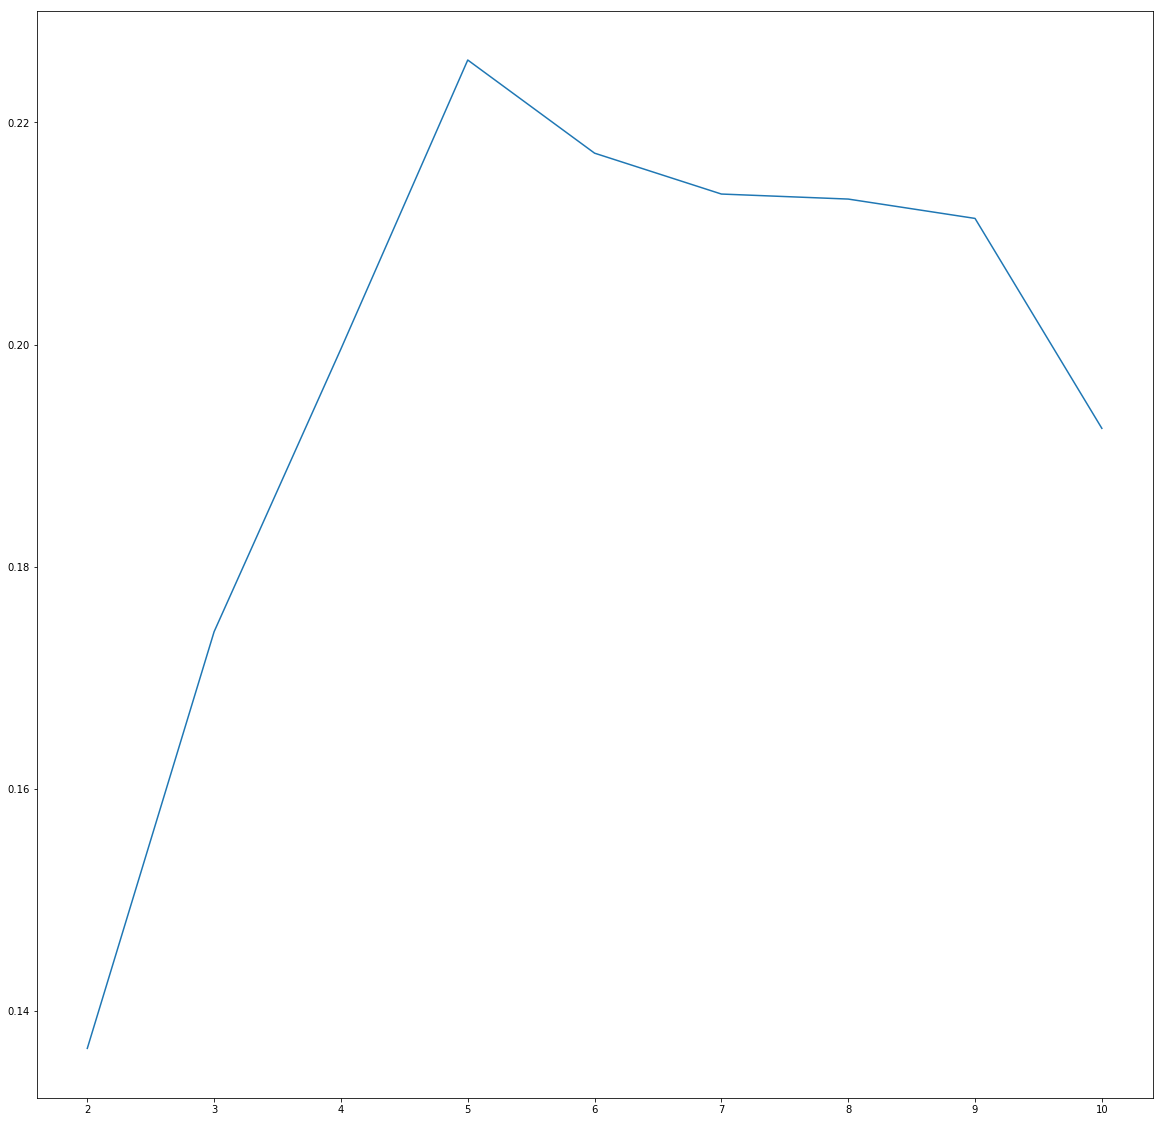

In [131]:
manager.clusterData()

In [132]:
manager.vocabulary

{'Algorithm': 41,
 'Neural': 27,
 'adobe': 46,
 'ajax': 3,
 'analyst': 39,
 'animation': 36,
 'animator': 23,
 'application': 7,
 'art': 11,
 'aws': 44,
 'character': 13,
 'clustering': 0,
 'computer': 49,
 'css': 1,
 'datasets': 20,
 'design': 42,
 'developer': 38,
 'effects': 26,
 'engine': 34,
 'firewall': 19,
 'flash': 52,
 'framework': 22,
 'game': 47,
 'html': 24,
 'illustrator': 5,
 'intelligence': 35,
 'ip': 43,
 'javascript': 10,
 'jquery': 17,
 'layer': 28,
 'logistic': 51,
 'maya': 50,
 'microsoft': 15,
 'mining': 2,
 'mysql': 30,
 'net': 45,
 'photoshop': 12,
 'php': 25,
 'programming': 37,
 'project': 32,
 'protocol': 18,
 'regression': 33,
 'router': 4,
 'scikit': 8,
 'server': 16,
 'skills': 53,
 'software': 31,
 'switch': 14,
 'systems': 48,
 'team': 40,
 'traffic': 6,
 'unity': 9,
 'visual': 29,
 'wan': 21}

In [133]:
manager.kMeans.labels_

array([2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 4, 1, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 4, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3,
       0, 0,

In [134]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.cluster import KMeans


# x = [916,684,613,612,593,552,487,484,475,474,438,431,421,418,409,391,389,388,
#     380,374,371,369,357,356,340,338,328,317,316,315,313,303,283,257,255,254,245,
#     234,232,227,227,222,221,221,219,214,201,200,194,169,155,140]

# kmeans = KMeans(n_clusters=4)
# a = kmeans.fit(np.reshape(x,(len(x),1)))
# centroids = kmeans.cluster_centers_

# labels = kmeans.labels_

# print(centroids)
# print(labels)

# colors = ["g.","r.","y.","b."]

# for i in centroids:
#     plt.plot( [0, len(x)-1],[i,i], "k" )
# for i in range(len(x)):
#     plt.plot(i, x[i], colors[labels[i]], markersize = 10)

# plt.show()

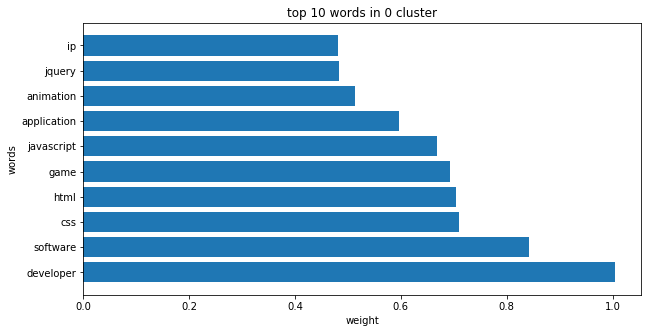

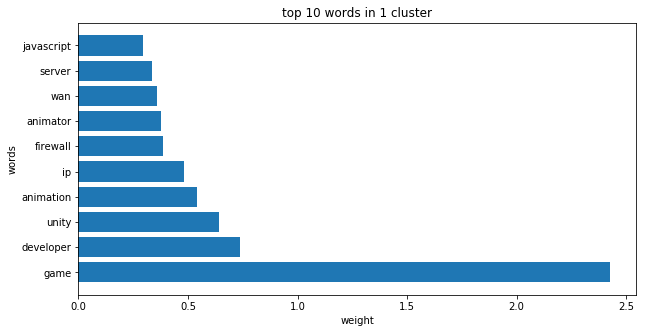

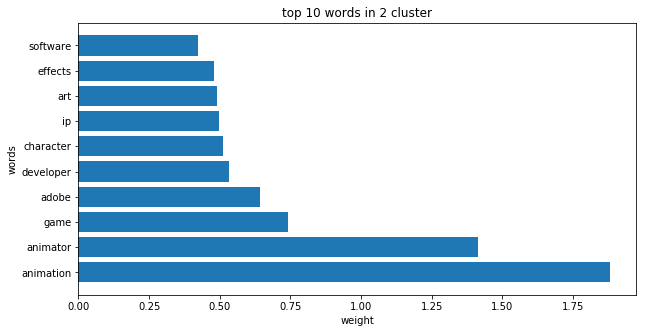

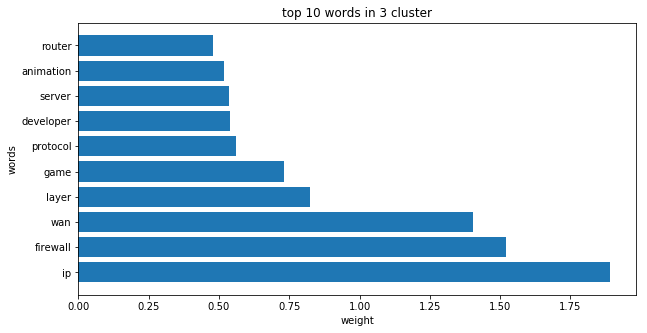

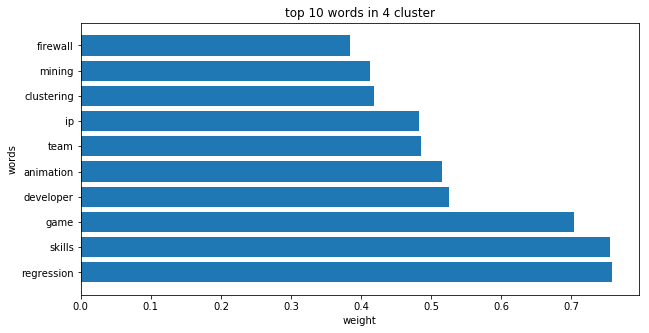

In [145]:
import matplotlib.pyplot as plt
topwords=10
width =1
for index,clusterTopWord in enumerate(manager.clusterWiseTopWordList):
    ig,ax = plt.subplots()
    lists = [(key,value) for (key,value) in clusterTopWord.items()] # sorted by key, return a list of tuples
    key, value = zip(*lists)
    x = np.arange(topwords)
    plt.barh(x[:topwords],value[:topwords],align='center')
    plt.yticks(x, key[:topwords])
    plt.rcParams["figure.figsize"] = (10,5)
    plt.title('top %d words in %d cluster'%(topwords,index))
    plt.ylabel('words')
    plt.xlabel('weight')
    plt.show()


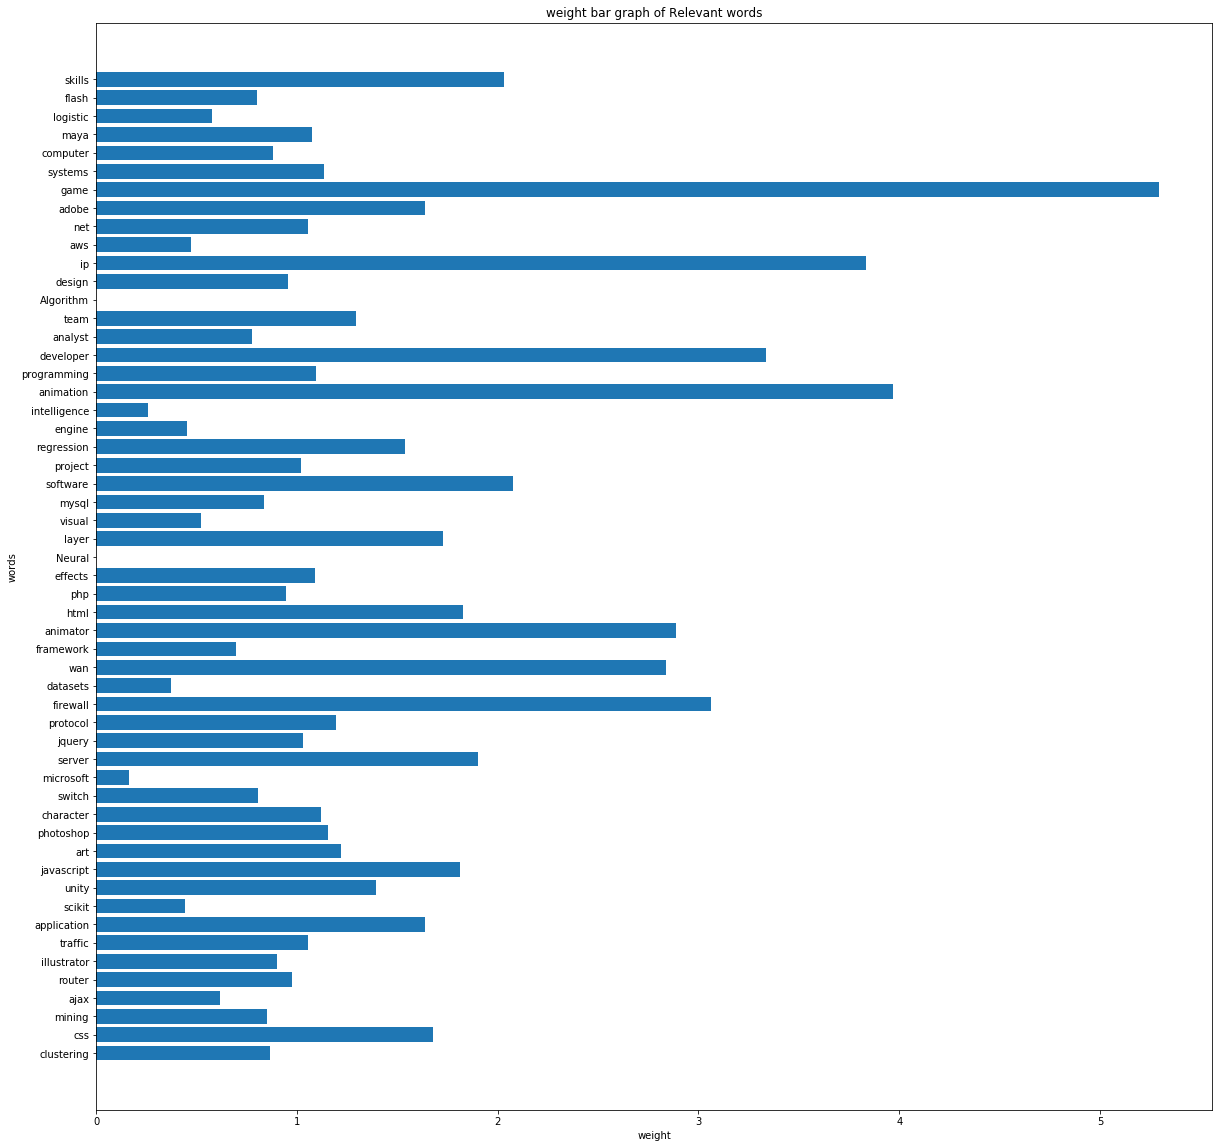

In [147]:
#for index,weight in enumerate(manager.overAllWeight)
import matplotlib.pyplot as pl
ig,ax = plt.subplots()
#lists = [(key,value) for (key,value) in clusterTopWord.items()] # sorted by key, return a list of tuples
#key, value = zip(*lists)
x = np.arange(0,len(manager.overAllWeight))
pl.barh(x,manager.overAllWeight,align='center')
pl.yticks(x,manager.vocabulary)
pl.rcParams["figure.figsize"] = (20,20)
pl.title('weight bar graph of Relevant words')
pl.ylabel('words')
pl.xlabel('weight')          
pl.show()

In [137]:
# import matplotlib.pyplot as plt; plt.rcdefaults()
# import numpy as np
# import matplotlib.pyplot as plt
 
# objects = ['Python', 'C++', 'Java', 'Perl', 'Scala', 'Lisp']
# y_pos = np.arange(len(objects))
# print(y_pos)
# performance = [10,8,6,4,2,1]
 
# plt.bar(y_pos, performance, align='center')
# plt.xticks(y_pos, objects)
# plt.ylabel('Usage')
# plt.title('Programming language usage')
 
# plt.show()

In [138]:
# print(np.__version__)

In [139]:
manager.vocabulary


{'Algorithm': 41,
 'Neural': 27,
 'adobe': 46,
 'ajax': 3,
 'analyst': 39,
 'animation': 36,
 'animator': 23,
 'application': 7,
 'art': 11,
 'aws': 44,
 'character': 13,
 'clustering': 0,
 'computer': 49,
 'css': 1,
 'datasets': 20,
 'design': 42,
 'developer': 38,
 'effects': 26,
 'engine': 34,
 'firewall': 19,
 'flash': 52,
 'framework': 22,
 'game': 47,
 'html': 24,
 'illustrator': 5,
 'intelligence': 35,
 'ip': 43,
 'javascript': 10,
 'jquery': 17,
 'layer': 28,
 'logistic': 51,
 'maya': 50,
 'microsoft': 15,
 'mining': 2,
 'mysql': 30,
 'net': 45,
 'photoshop': 12,
 'php': 25,
 'programming': 37,
 'project': 32,
 'protocol': 18,
 'regression': 33,
 'router': 4,
 'scikit': 8,
 'server': 16,
 'skills': 53,
 'software': 31,
 'switch': 14,
 'systems': 48,
 'team': 40,
 'traffic': 6,
 'unity': 9,
 'visual': 29,
 'wan': 21}

In [140]:
# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib import style
# style.use("ggplot")
# from sklearn.cluster import KMeans

In [141]:
# x = [1, 5, 1.5, 8, 1, 9]
# y = [2, 8, 1.8, 8, 0.6, 11]

# plt.scatter(x,y)
# plt.show()

In [142]:
# colors = ["g.","r.","c.","y."]

# for i in range(len(X)):
#     print("coordinate:",X[i], "label:", labels[i])
#     plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize = 10)


# plt.scatter(centroids[:, 0],centroids[:, 1], marker = "x", s=150, linewidths = 5, zorder = 10)

# plt.show()

In [143]:
cvlist={}
for cvCategery in set(manager.cvPostList):
    cvlist={}
    print("cv of %s"%cvCategery)
    for cv in manager.CVList:
        if(cv.CVCategory==cvCategery):
            #print("cvCategery %s cv.CVCategory %s"%(cvCategery,cv.CVCategory))
            cvlist.update({cv.filePath:cv.score})
    temp=[(value,key) for key,value in cvlist.items()]
    #print(temp)
    temp.sort()
    #print(temp)
    temp.reverse()
    #print(temp)
    temp=[(key,value) for value,key in temp]
    for cvPath in temp[:10]:
        print(cvPath)
    #print(cvlist.items())
            
            
    
    

cv of SoftwareDEVEloper
('CV coll\\x\\shubham\\SoftwareDEVEloper\\Annie-Enchakattu.pdf', 429.68670794255297)
('CV coll\\x\\shubham\\SoftwareDEVEloper\\Kalpna-Patel.pdf', 292.43497870740498)
('CV coll\\x\\shubham\\SoftwareDEVEloper\\Ranjini-Devi-Ramakrishnan.pdf', 216.43941144988216)
('CV coll\\x\\shubham\\SoftwareDEVEloper\\Chandra-Neelam.pdf', 192.69106789770666)
('CV coll\\x\\shubham\\SoftwareDEVEloper\\Miguel-Contreras.pdf', 187.93170937164683)
('CV coll\\x\\shubham\\SoftwareDEVEloper\\Svetlana-Sargsian.pdf', 185.28293411451645)
('CV coll\\x\\shubham\\SoftwareDEVEloper\\Sekhar-M.pdf', 162.6443525502346)
('CV coll\\x\\shubham\\SoftwareDEVEloper\\Robert-Bruce.pdf', 161.10644028320263)
('CV coll\\x\\shubham\\SoftwareDEVEloper\\Preksha-Shah.pdf', 159.7817295870008)
('CV coll\\x\\shubham\\SoftwareDEVEloper\\shaik-r.pdf', 152.66390027671696)
cv of network engineer
('CV coll\\x\\sagar\\network engineer\\Muhammad-S.pdf', 346.41051472790679)
('CV coll\\x\\sagar\\network engineer\\Nirav-patel